# Load Data

Load data using Python's `open` function to read `.csv` file

In [1]:
# import necessary libraries
import matplotlib.pyplot as plt
import numpy as np

# open csv file
with open('ds_challenge_train.csv', 'r') as f:
    data = f.readlines()
# remove last character `\n`
data = np.array([x[:-1].split(',') for x in data])

# Preprocess Data

In [2]:
# split each rows into label and features
X = data[:,1:]
y = data[:,0]

Convert `X` into an image by reshaping data into square.

In [3]:
N, M = X.shape
# N is number of samples, M is image size
# since the image is a square, we can obtain the width, height of the image by taking square root if M
size = int(M**0.5)
print('There are {} samples, with image size of {}x{} pixels'.format(N, size, size))

There are 20000 samples, with image size of 28x28 pixels


In [4]:
X = data[:,1:].reshape(N, size, size)

However, data type of `X` is still `str`, we need to convert it into `int` data type.

In [5]:
# convert X into `int` type
X = X.astype(int)

ValueError: invalid literal for int() with base 10: '-'

Notice that this blocks create an error as there is a missing value interpreted as `-`. In this case, we will replace this value with `0` which denotes black pixel. In other word, we can see missing value as a black pixel.

In [6]:
X = np.where(X == '-', '0', X) # replace '-' with '0'

In [7]:
X = X.astype(int) # convert to int

ValueError: invalid literal for int() with base 10: ''

Still, there is a missing values which is an empty string `''`. Again, we will fill it with 0

In [ ]:
X = np.where(X == '', '0', X) # replace '-' with '0'

In [ ]:
X = X.astype(int) # convert to int

In [ ]:
y = y.astype(int) # convert label to int

Now, the code looks fine! It is time to normalize the data by dividing image by 255. We divide by 255 to ensure that the image input values range between 0 to 1 as the pixels range are between 0 to 255 (8-bit resolution).

In [11]:
X = X/255.

Now, let's inspect the input data

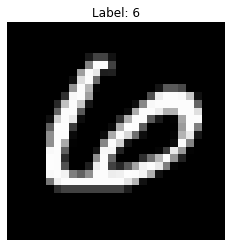

In [12]:
idx=0
plt.imshow(X[idx], cmap='gray')
plt.title('Label: {}'.format(y[idx]))
plt.axis('off')
plt.show()

Since we will use CNN in our model (see `Modeling` section later), the input shape should be 3 dimensional. Therefore, we will increase the dimension using `np.expand_dims`

In [13]:
# convert shape from (20000, 28, 28) to (20000, 28, 28, 1)
X = np.expand_dims(X, -1)

# Train test split

We do a classic train/test split using 70% training and 30% testing

In [14]:
from sklearn.model_selection import train_test_split

# split training set using `train_test_split`
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1234)

# Modeling

To make a prediction model, we use a simple Convolutional Neural Networks (CNN) with 3 layers following by Fully conected layer.

## Model
### Convolutional Neural Networks (CNN)
CNN is a type of neural network which use the concept of convolution to find matched filter. The CNN learns the **filters** which will be used to convolved with the input signal (which is an input image in this case) and learn the best filters that will find a pattern. This type of neural network typically used together with **Max Pooling Layer**

### Max Pooling Layer
This layers allow the feature map (output from CNN) to be reduced in size. Which makes the later CNN layer have a larger receptive field with less computational cost.

### Fully Connected (FC)
Fully connected layer is comparable to Multilayer Perceptron which mimics the use of human brain. It connected with a mesh of connection between input and output nodes where the model learns to find a proper weight connection between input and output nodes.

## Optimization
Both CNN and FC learn it weights (and filters) using a gradient-based optimization method which is backpropagation algorithm. We can choose which optimizer to use from tensorflow's library.

## Architecture
We use 3 layers of convolution and max pool layers before flatten the feature maps to be a vector. After that, the vectorized feature map is passed to a fully connected layer with 128 units before passing to a classification layer (softmax layer) which emits output probabilities.

In [15]:
from tensorflow.keras.layers import *
from tensorflow.keras.optimizers import *
from tensorflow.keras.models import Sequential
from tensorflow.keras import backend as K

K.clear_session()
model = Sequential([
    Conv2D(filters=8, kernel_size=(3, 3), padding='same', activation='relu', input_shape=(28, 28, 1)),
    MaxPool2D(pool_size=(2, 2)),
    Conv2D(filters=16, kernel_size=(3, 3), padding='same', activation='relu'),
    MaxPool2D(pool_size=(2, 2)),
    Conv2D(filters=32, kernel_size=(3, 3), padding='same', activation='relu'),
    MaxPool2D(pool_size=(2, 2)),
    Flatten(), # convert feature maps into a vector
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])
model.compile(loss='sparse_categorical_crossentropy', optimizer=Adam(1e-4), metrics=['accuracy'])
model.summary()

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 8)         80        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 8)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 16)        1168      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 16)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 32)          4640      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 3, 3, 32)          0         
____

In [16]:
history = model.fit(X_train, y_train, batch_size=64, epochs=20)

Epoch 1/20
14000/14000 [==============================] - 5s 335us/sample - loss: 2.0918 - acc: 0.4416
Epoch 2/20
14000/14000 [==============================] - 4s 301us/sample - loss: 0.8725 - acc: 0.7978
Epoch 3/20
14000/14000 [==============================] - 4s 294us/sample - loss: 0.4434 - acc: 0.8780
Epoch 4/20
14000/14000 [==============================] - 4s 295us/sample - loss: 0.3259 - acc: 0.9090
Epoch 5/20
14000/14000 [==============================] - 4s 318us/sample - loss: 0.2655 - acc: 0.9241
Epoch 6/20
14000/14000 [==============================] - 4s 319us/sample - loss: 0.2268 - acc: 0.9354
Epoch 7/20
14000/14000 [==============================] - 4s 302us/sample - loss: 0.2010 - acc: 0.9412
Epoch 8/20
14000/14000 [==============================] - 4s 312us/sample - loss: 0.1828 - acc: 0.9466
Epoch 9/20
14000/14000 [==============================] - 4s 321us/sample - loss: 0.1685 - acc: 0.9491
Epoch 10/20
14000/14000 [==============================] - 4s 298us/sampl

# Evaluation

In [17]:
from sklearn.metrics import accuracy_score

y_pred = np.argmax(model.predict(X_test), axis=-1) # get prediction
accuracy = accuracy_score(y_test, y_pred)

In [18]:
print('Model Accuracy: {:.2f}%'.format(accuracy*100))

Model Accuracy: 96.25%


According to the result, 96.25% seems to be an acceptable accuracy. However, there is still a lot of room to be improved for this model using the following techniques:
- Data Augmentation
- Batch Normalization
- Dropout
- etc.